## <center><h2> LSTM IN TSA </h2></center>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras import callbacks, optimizers


In [2]:
df=pd.read_csv("international-airline-passengers.csv",index_col='Month')


In [3]:
df.head(10)
df.index.name


'Month'

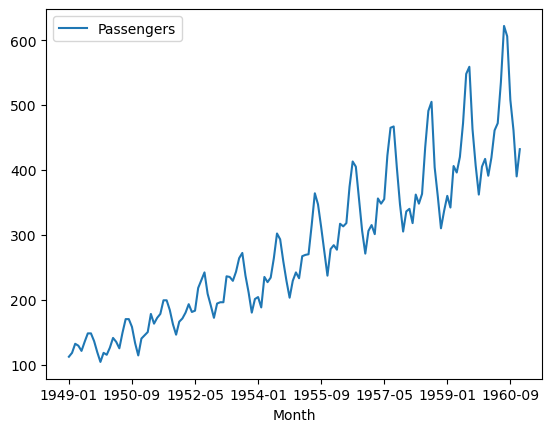

In [4]:
df.plot()
plt.show()

In [5]:
df.shape

(146, 1)

In [6]:
df.isnull().sum()

Passengers    2
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.shape

(144, 1)

In [9]:
df.isnull().sum()

Passengers    0
dtype: int64

In [10]:
#df['Passengers']=df["Passengers"]*1000

#set index to month
df.index.names=['Month']

df.sort_index(inplace=True)

print('Total rows:{}'.format(len(df)))

df.head()


Total rows:144


,Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [11]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


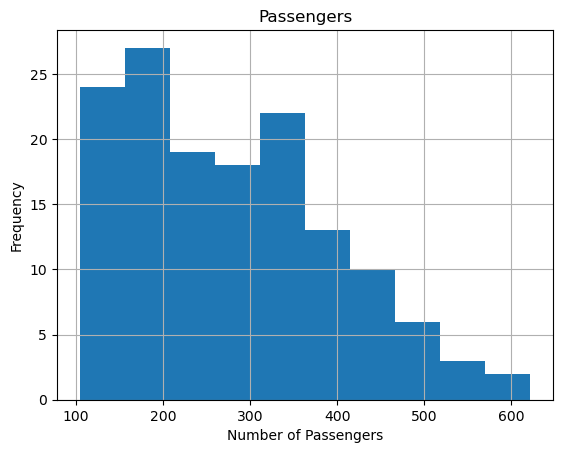

In [12]:
plt.figure()
plt.hist(df['Passengers'], bins=10)
plt.title("Passengers")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.grid()
plt.show()


In [13]:
np.min(df)

104.0

In [14]:
print('Min',np.min(df))


print("Max",np.max(df))

Min 104.0
Max 622.0


In [15]:
df.dtypes

Passengers    float64
dtype: object

In [16]:
dataset = df[['Passengers']].values.astype("float32")


In [16]:
#convert the datatype
dataset=df.astype("float32")

In [18]:
#dataset.dtypes

In [19]:
#apply minmaxscaler
scaler=MinMaxScaler(feature_range=(0,1))

#apply fit_transform
scaled=scaler.fit_transform(dataset)

In [20]:
print('min',np.min(scaled))
print('Max',np.max(scaled))

min 0.0
Max 1.0


In [21]:
print(scaled[:10])

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]]


In [22]:
train_size = int(len(scaled) * 0.70)
train, test = scaled[:train_size], scaled[train_size:]


print('train: {}\ntest: {}'.format(len(train),len(test)))

train: 100
test: 44


In [23]:
import numpy as np

def create_dataset(dataset, look_back=1):
    print("Total rows:", len(dataset), "Look back:", look_back)
    
    dataX, dataY = [], []
    
    for i in range(len(dataset) - look_back - 1):
        
        # X = past look_back values
        a = dataset[i:(i + look_back), 0]
        
        # Y = next value
        y = dataset[i + look_back, 0]
        
        dataX.append(a)
        dataY.append(y)
        
        
    
    return np.array(dataX), np.array(dataY)


In [24]:
look_back=1
#apply function to train data
X_train,y_train=create_dataset(train,look_back)

#apply function to test data
X_test,y_test=create_dataset(test,look_back)

Total rows: 100 Look back: 1
Total rows: 44 Look back: 1


In [25]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

print(X_train.shape)
print(X_test.shape)

(98, 1, 1)
(42, 1, 1)


In [26]:
batch_size=1
model=Sequential()

model.add(LSTM(50,batch_input_shape=(batch_size,look_back,1)))


model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,epochs=100,batch_size=batch_size,verbose=2,shuffle=False)

Epoch 1/100
98/98 - 5s - loss: 0.0047 - 5s/epoch - 53ms/step
Epoch 2/100
98/98 - 0s - loss: 0.0174 - 360ms/epoch - 4ms/step
Epoch 3/100
98/98 - 0s - loss: 0.0115 - 329ms/epoch - 3ms/step
Epoch 4/100
98/98 - 0s - loss: 0.0078 - 316ms/epoch - 3ms/step
Epoch 5/100
98/98 - 0s - loss: 0.0054 - 327ms/epoch - 3ms/step
Epoch 6/100
98/98 - 0s - loss: 0.0039 - 326ms/epoch - 3ms/step
Epoch 7/100
98/98 - 0s - loss: 0.0030 - 329ms/epoch - 3ms/step
Epoch 8/100
98/98 - 0s - loss: 0.0026 - 323ms/epoch - 3ms/step
Epoch 9/100
98/98 - 0s - loss: 0.0024 - 312ms/epoch - 3ms/step
Epoch 10/100
98/98 - 0s - loss: 0.0023 - 314ms/epoch - 3ms/step
Epoch 11/100
98/98 - 0s - loss: 0.0023 - 320ms/epoch - 3ms/step
Epoch 12/100
98/98 - 0s - loss: 0.0022 - 307ms/epoch - 3ms/step
Epoch 13/100
98/98 - 0s - loss: 0.0022 - 321ms/epoch - 3ms/step
Epoch 14/100
98/98 - 0s - loss: 0.0022 - 311ms/epoch - 3ms/step
Epoch 15/100
98/98 - 0s - loss: 0.0022 - 310ms/epoch - 3ms/step
Epoch 16/100
98/98 - 0s - loss: 0.0022 - 320ms/epoc

In [27]:
import math


from sklearn.metrics import mean_squared_error


trainPredict=model.predict(X_train,batch_size=batch_size)

#model.reset_states()

testPredict=model.predict(X_test,batch_size=batch_size)


trainPredict=scaler.inverse_transform(trainPredict)


y_train=scaler.inverse_transform(y_train.reshape(-1,1))


testPredict=scaler.inverse_transform(testPredict)

y_test=scaler.inverse_transform(y_test.reshape(-1,1))


trainScore=math.sqrt(mean_squared_error(y_train[:,0], trainPredict[:,0]))

    #mean_squared_error(y_train[0],trainPredict[:,0]))
                     
testScore = math.sqrt(mean_squared_error(y_test[:,0], testPredict[:,0]))
    #mean_squared_error(y_test[0], testPredict[:,0])

                     
                     
print('Train Score :%.2f RMSE' % (trainScore))
                     
print('Test Score:%.2f RMSE'% (testScore))




42/42 [==============================] - 0s 3ms/step
Train Score :24.50 RMSE
Test Score:48.88 RMSE


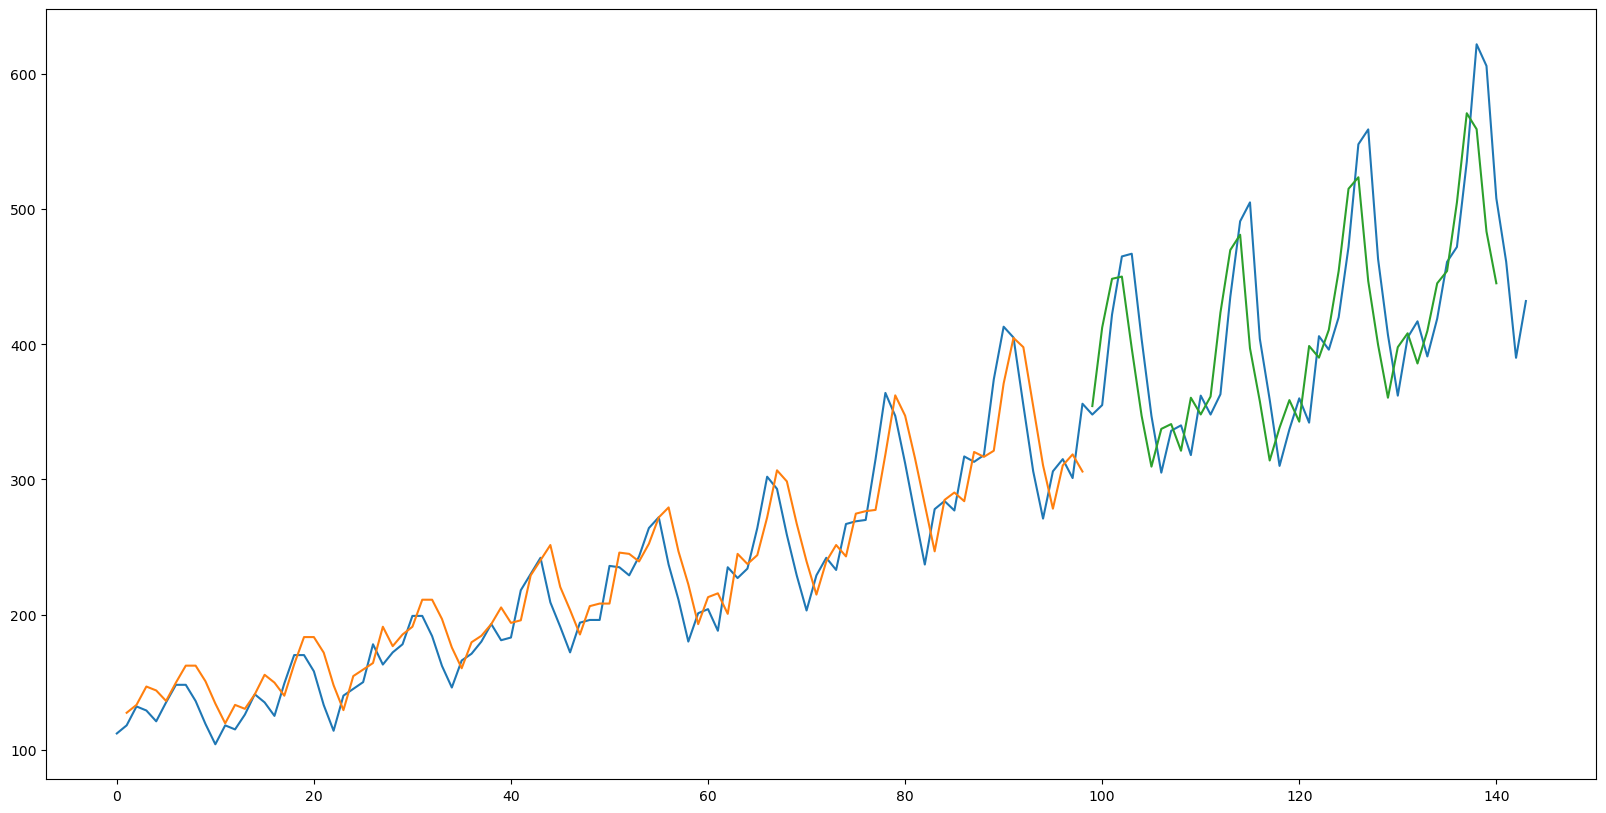

In [28]:
trainPredictPlot=np.empty_like(scaled)

trainPredictPlot[:,:] = np.nan


trainPredictPlot[look_back:len(trainPredict)+look_back,:]= trainPredict

testPredictPlot=np.empty_like(scaled)


#fill testPredictPlot with nan values
testPredictPlot[:,:] = np.nan
#fill testPredictPlot with values from testPredict
start = len(trainPredict) + look_back
testPredictPlot[start:start+len(testPredict), :] = testPredict

#set figuresize
plt.figure(figsize=(20,10))

#plot original scaled data
plt.plot(scaler.inverse_transform(scaled))

#plot trainPredictPlot
plt.plot(trainPredictPlot)

#plot testPredictPlot
plt.plot(testPredictPlot)


plt.show()






In [30]:
model.save("model.h5")


In [31]:
import pickle

with open("scaler(2).pkl", "wb") as f:
    pickle.dump(scaler, f)
